# Association Between Final Grade in Math and Family/Social Life Aspects of Students in Secondary Education in Portugal - Research Paper

## Introduction

The dataset "Student Performance" created by Paulo Cortez and Alice Silva was collected during the 2005-2006 school year from the public schools Gabriel Pereira and Mousinho da Silveira in Portugal, consisting of 395 observations. In total, there are 32 explanatory variables and the response variable: the final grade of a participant in Mathematics. It has both continuous and categorical attributes and addresses classification tasks.

Our group will focus on students' performance, particularly in mathematics, in secondary education where information such as personal, family, and school aspects were collected using school reports and questionnaires. 

 **Research Question**: Which aspects of family and social life are significantly associated with the final grade in Mathematics? 

To answer this question, we will examine ten possible covariates that may affect a student's final grade in mathematics. This data can be accessed from ttps://archive.ics.uci.edu/dataset/320/student+performance 

Reference:
Cortez, P., & Silva, A. M. G. (2008). Using data mining to predict secondary school student performance. In A. Brito, & J. Teixeira (Eds.), Proceedings of 5th Annual Future Business Technology Conference, Porto, 5-12. 

|Variable|Unit|Values|
|--------|----|---------------|
|sex: student's sex|NA|'F' = female; 'M' = male|
|age: student's age|years|integers from 15 to 22|
|Pstatus: parent's cohabitation status|NA|'T' = living together; 'A' = apart|
|Medu: mother's education|NA|0 = none; 1 = primary education (4th grade); 2 = (5th to 9th grade); 3 = secondary education; 4 = higher education|
|Fedu: father's education|NA|0 = none; 1 = primary education (4th grade); 2 = (5th to 9th grade); 3 = secondary education; 4 = higher education|
|activities: extracurricular activities|NA|0 = no; 1 = yes|
|freetime: free time after school|NA|from 1 = very low to 5 = very high|
|absences: number of school absences|NA|0 to 93|
|G1: first period grade|NA|0-20|
|G2: first period grade|NA|0-20|

**Table 0.1: List of Variable Names**

## Methods

Our objective is to find the covariates that best explain a student's final grade. The measures we will take to do this are as follows:
1. Read in and tidy the dataset: After loading in the dataset, it must be tidied.
2. Visualize the dataset: Create some simple scatterplots and boxplots to understand potential relationships between variables.
3. Residual Plots and Normality Plots: Validate Assumptions.
4. Discussion of results.

## Analysis

### Dataset and Analysis Preparation

In [1]:
install.packages("leaps") # Run this if an installation of leaps is required
install.packages("patchwork") # Run this if an installation of Patchwork is required

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)

Warning message in install.packages("patchwork"):
“installation of package ‘patchwork’ had non-zero exit status”


In [2]:
library(leaps)
library(tidyverse)
library(dplyr)
library(car)
library(MASS)
library(ggplot2)
library(patchwork)
options(repr.plot.width=12, repr.plot.height=5)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘patchwork’


The following object is masked from ‘package:MASS’:

    area




In [3]:
studentData <- read.table("student-mat.csv", sep=";", header=TRUE)
head(studentData)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [4]:
# Extract the explanatory terms and the response
studentData <- studentData[, c('sex', 'age', 'Pstatus', 'Medu', 'Fedu', 'activities', 'freetime', 'absences', 'G1', 'G2', 'G3')]

In [5]:
# Check for missing data to handle
sum(is.na(studentData))

[1] 0

We also want to distinguish each variable as numeric or a factor in this study. Sex, Pstatus, and activities are factors due to their binary nature. Medu and Fedu are decided to be factors since they use numbers to represent categorical education levels. Freetime is a rating system, but is numeric due to its ordinal nature. Age, absences, and G3 are numeric in nature. 

In [34]:
studentData <- studentData %>%
    mutate(sex = as.factor(sex), 
           age = as.numeric(age),
           Pstatus = as.factor(Pstatus), 
           Medu = as.factor(Medu),
           Fedu = as.factor(Fedu),
           activities = as.factor(activities),
           freetime = as.numeric(freetime), 
           absences = as.numeric(absences), 
           G1 = as.numeric(G1),
           G2 = as.numeric(G2),
           G3 = as.numeric(G3))
head(studentData)

,sex,age,Pstatus,Medu,Fedu,activities,freetime,absences,G1,G2,G3
,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,18,A,4,4,no,3,6,5,6,6
2,F,17,T,1,1,no,3,4,5,5,6
3,F,15,T,1,1,no,3,10,7,8,10
4,F,15,T,4,2,yes,2,2,15,14,15
5,F,16,T,3,3,no,3,4,6,10,10
6,M,16,T,4,3,yes,4,10,15,15,15


### Preliminary Visualizations and Summaries

Some basic summaries and statistics can be generated with simple R commands.

In [35]:
summary(studentData)

## Number of observations
n <- nrow(studentData)
cat("There are ", n, " observations.")

 sex          age       Pstatus Medu    Fedu    activities    freetime    
 F:208   Min.   :15.0   A: 41   0:  3   0:  2   no :194    Min.   :1.000  
 M:187   1st Qu.:16.0   T:354   1: 59   1: 82   yes:201    1st Qu.:3.000  
         Median :17.0           2:103   2:115              Median :3.000  
         Mean   :16.7           3: 99   3:100              Mean   :3.235  
         3rd Qu.:18.0           4:131   4: 96              3rd Qu.:4.000  
         Max.   :22.0                                      Max.   :5.000  
    absences            G1              G2              G3       
 Min.   : 0.000   Min.   : 3.00   Min.   : 0.00   Min.   : 0.00  
 1st Qu.: 0.000   1st Qu.: 8.00   1st Qu.: 9.00   1st Qu.: 8.00  
 Median : 4.000   Median :11.00   Median :11.00   Median :11.00  
 Mean   : 5.709   Mean   :10.91   Mean   :10.71   Mean   :10.42  
 3rd Qu.: 8.000   3rd Qu.:13.00   3rd Qu.:13.00   3rd Qu.:14.00  
 Max.   :75.000   Max.   :19.00   Max.   :19.00   Max.   :20.00  

There are  395  observations.

In [36]:
str(studentData)

'data.frame':	395 obs. of  11 variables:
 $ sex       : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 1 2 2 ...
 $ age       : num  18 17 15 15 16 16 16 17 15 15 ...
 $ Pstatus   : Factor w/ 2 levels "A","T": 1 2 2 2 2 2 2 1 1 2 ...
 $ Medu      : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 5 4 5 3 5 4 4 ...
 $ Fedu      : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 3 4 4 3 5 3 5 ...
 $ activities: Factor w/ 2 levels "no","yes": 1 1 1 2 1 2 1 1 1 2 ...
 $ freetime  : num  3 3 3 2 3 4 4 1 2 5 ...
 $ absences  : num  6 4 10 2 4 10 0 6 0 0 ...
 $ G1        : num  5 5 7 15 6 15 12 6 16 14 ...
 $ G2        : num  6 5 8 14 10 15 12 5 18 15 ...
 $ G3        : num  6 6 10 15 10 15 11 6 19 15 ...


However, these numbers may seem a little cryptic, so we follow with some visualizations that can better describe the data that we are working with.

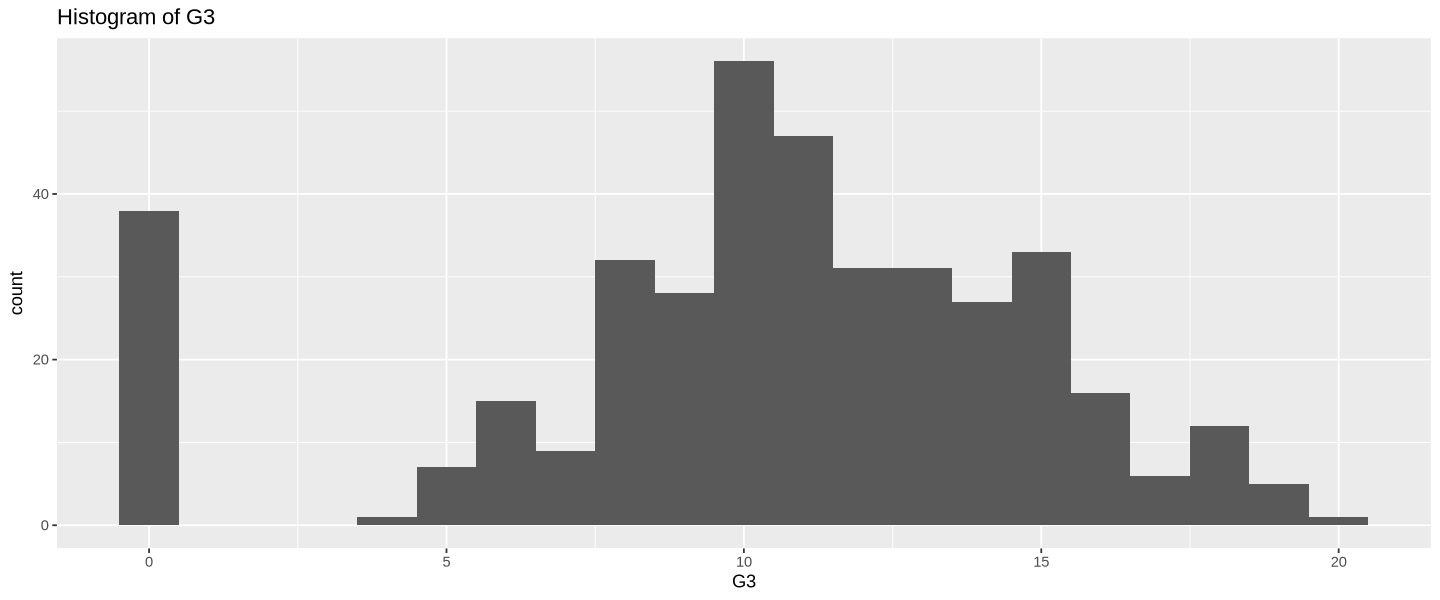

In [37]:
# Distribution of G3
ggplot(studentData, aes(x = G3)) +
  geom_histogram(binwidth=1) +
  ggtitle("Histogram of G3")

This histogram shows an approximately normal distribution about the mean (10.42), despite a number of outliers sitting at the left end of the distribution (with a G3 score of zero).

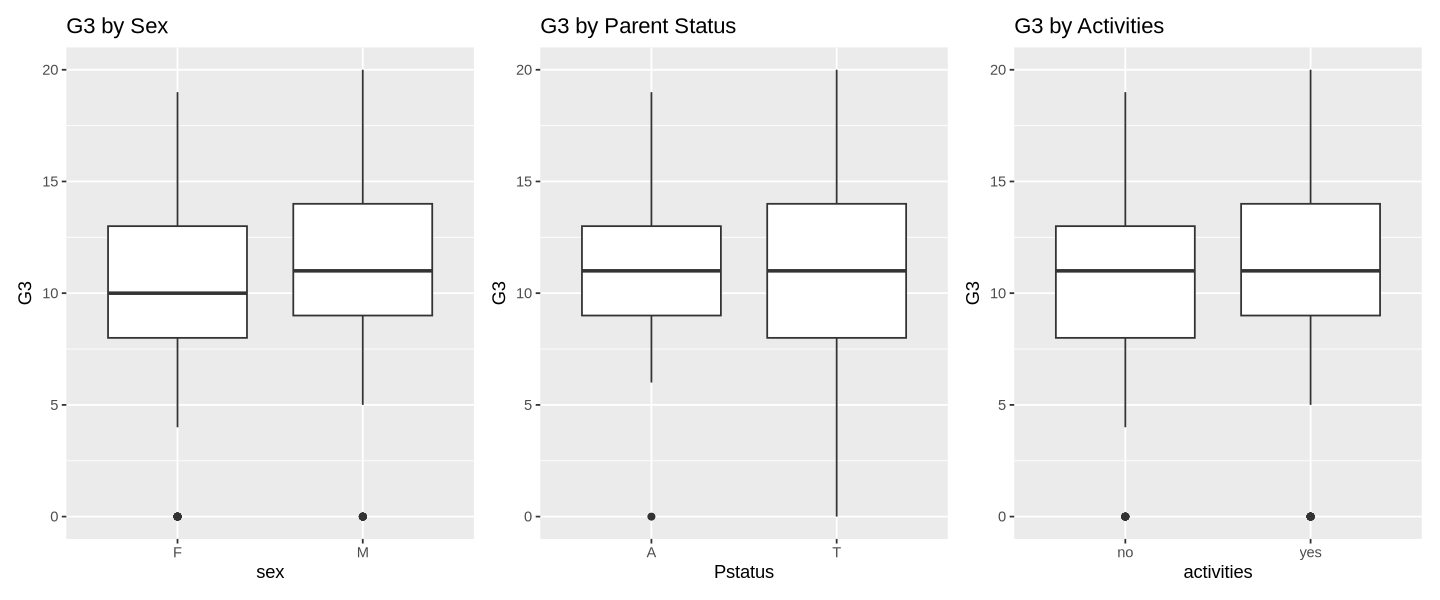

In [38]:
# Boxplots for binary explanatory variables
p1 <- ggplot(studentData, aes(x = sex, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Sex")
p2 <- ggplot(studentData, aes(x = Pstatus, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Parent Status")
p3 <- ggplot(studentData, aes(x = activities, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Activities")
(p1 | p2 | p3)

We can see that the median G3 score is identical among the two different Pstatuses; however, there is a much larger spread among the scores of those with the "T" Pstatus (which means that the parents are living together). For activities, we also see that the median score is the same for those that with or without extracurricular activities, although it seems that the two boxplots have different tails in their distributions. Finally, for the sex variable, it seems that the distribution is fairly similar, with male students having slightly higher G3 scores overall. There can be confounding variables that affect conclusions made solely based on these visualizations, however.

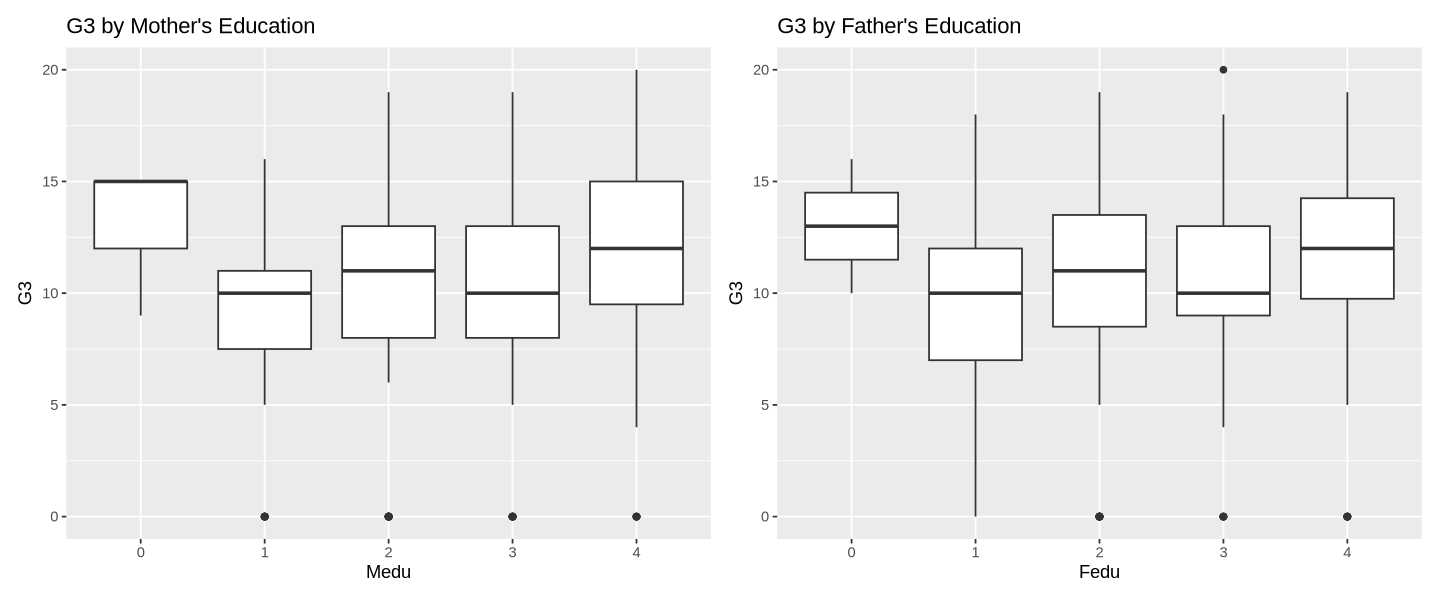

In [39]:
# Multi-level boxplots for Medu and Fedu factor variables
p4 <- ggplot(studentData, aes(x = Medu, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Mother's Education")
p5 <- ggplot(studentData, aes(x = Fedu, y = G3)) +
  geom_boxplot() +
  labs(title = "G3 by Father's Education")
(p4 | p5)

The boxplots comparing G3 scores with the educational levels of both mothers (Medu) and fathers (Fedu) show a general upward trend in G3 as Medu/Fedu scores increase, with the exception of having a Medu or Fedu score of 0 (these individuals seems to have a fairly high G3 score, with lower spread as well). However, the boxplot doesn't show how many responses are in each Medu/Fedu level, which can be slightly misleading.

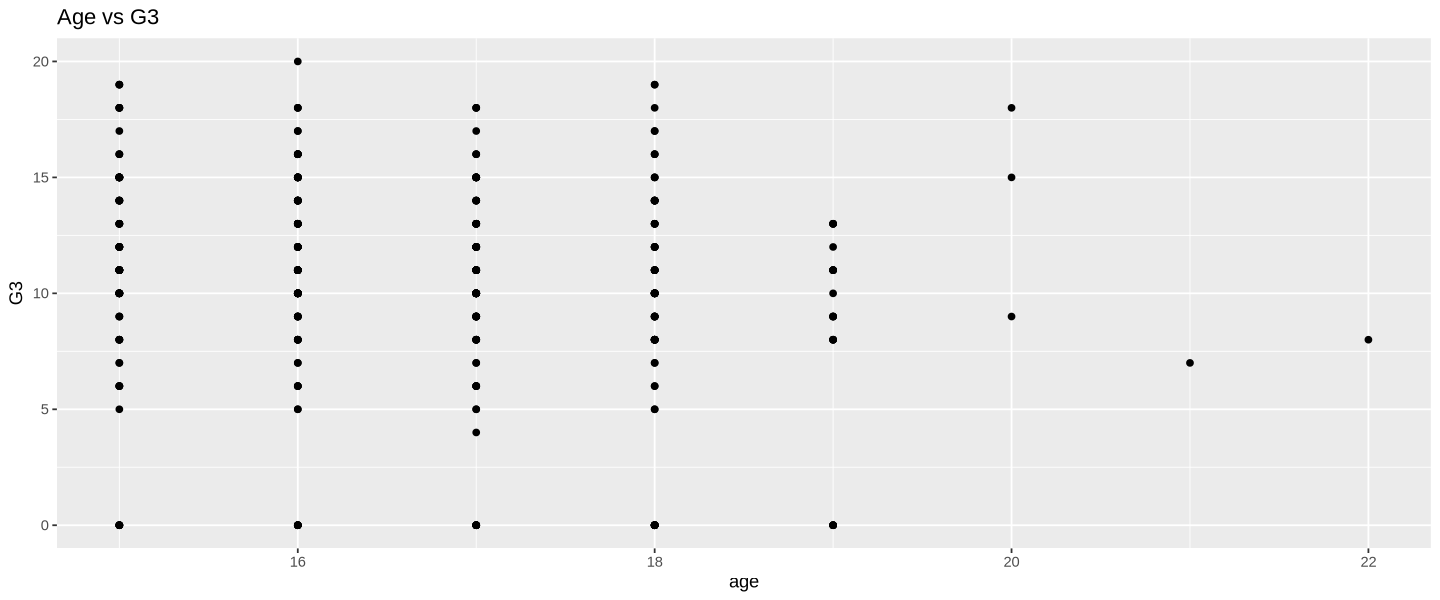

In [40]:
# Scatterplots for numeric data
# Age vs G3
p6 <- ggplot(studentData, aes(x = age, y = G3)) +
  geom_point() +
  ggtitle("Age vs G3")

# Freetime vs G3b
p7 <- ggplot(studentData, aes(x = freetime, y = G3)) +
  geom_point() +
  ggtitle("Freetime vs G3")

# absences vs G3
p8 <- ggplot(studentData, aes(x = absences, y = G3)) +
  geom_point() +
  ggtitle("Absences vs G3")
p6

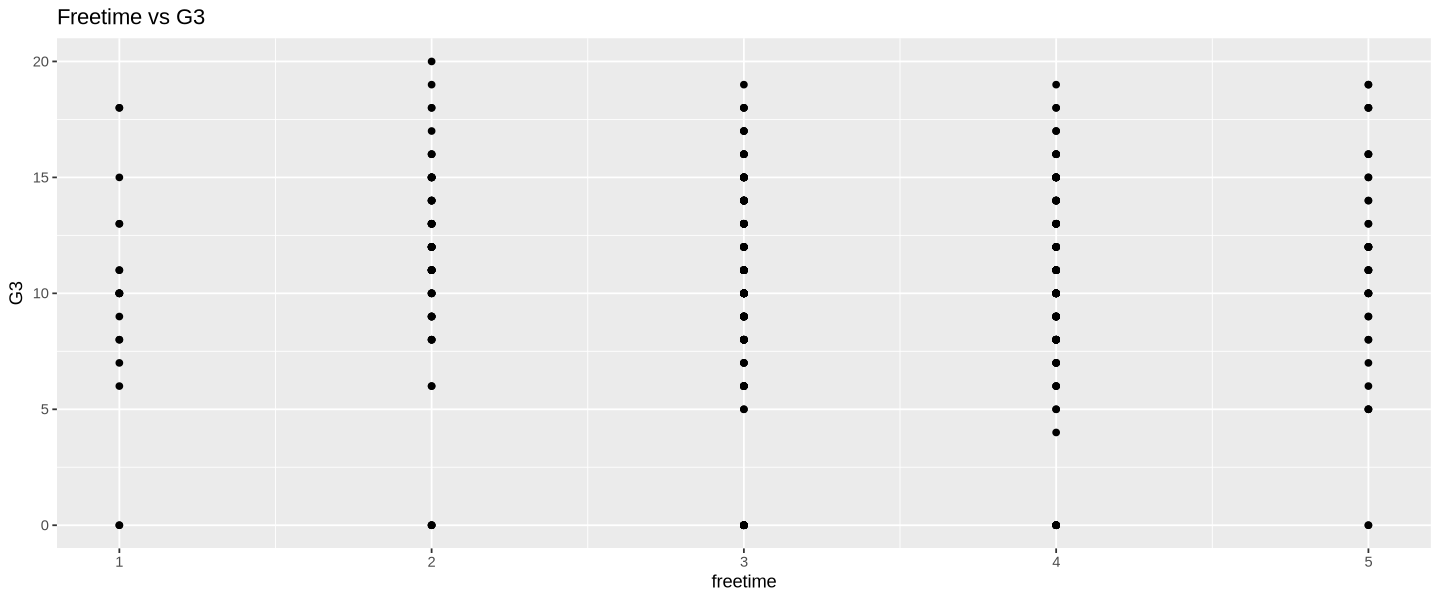

In [41]:
p7

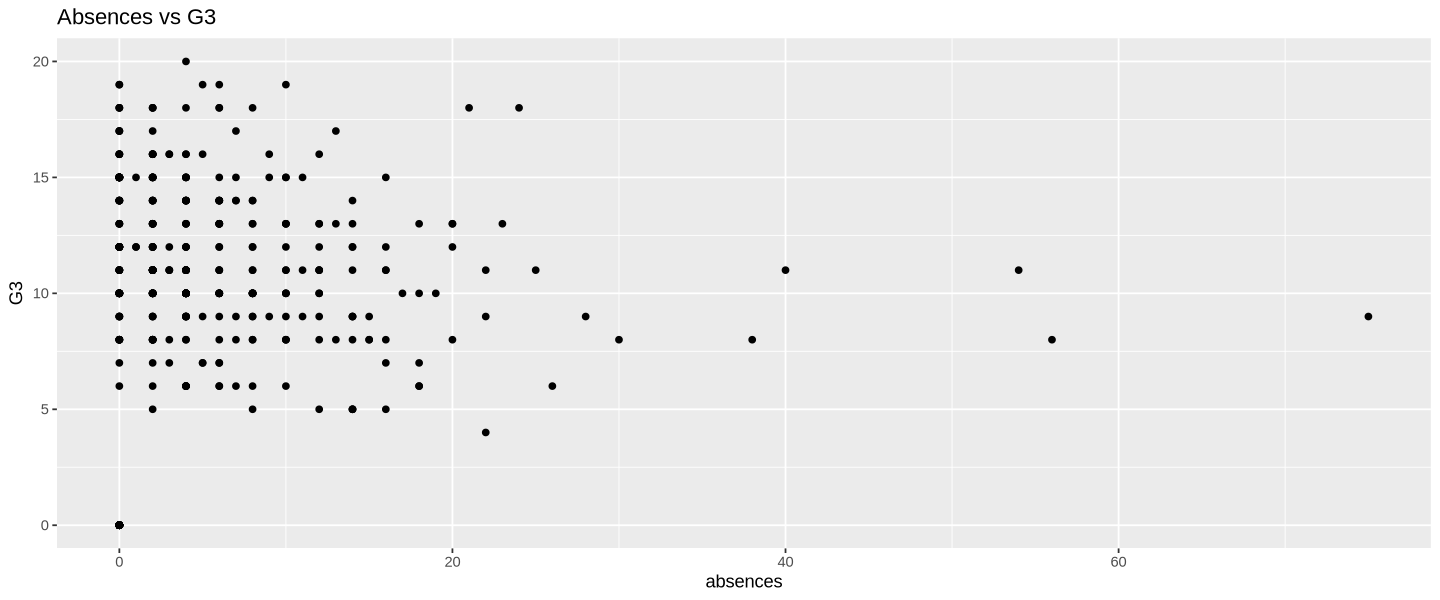

In [42]:
p8

These scatterplots do not show a clear linear relationship between a singular numeric explanatory variables and G3. We will further explore how a combination of these variables, as well as categorical covariates, may help us draw more thorough conclusions.

## Analysis

The initial part of the analysis is to check for correlation among the numeric covariates.

In [43]:
numeric_vars <- c("age", "freetime", "absences", "G1", "G2")
df_numeric <- studentData[, numeric_vars]

## Correlation check, round to 4 decimals
cor_matrix <- cor(df_numeric, use = "pairwise.complete.obs")
round(cor_matrix, 4)

,age,freetime,absences,G1,G2
age,1.0000,0.0164,0.1752,-0.0641,-0.1435
freetime,0.0164,1.0000,-0.0581,0.0126,-0.0138
absences,0.1752,-0.0581,1.0000,-0.0310,-0.0318
G1,-0.0641,0.0126,-0.0310,1.0000,0.8521
G2,-0.1435,-0.0138,-0.0318,0.8521,1.0000


It is clear from the correlation matrix that G1 and G2 are highly correlated, which tracks with the literature where the authors state a similar conclusion. For the initial model, we will remove these to estimate the total effect of the selected family and social variables on final grade, G3.

In [44]:
## Initial Model without G1 and G2
model_initial <- lm(G3 ~ . -G1 -G2, data = studentData)
summary(model_initial)


Call:
lm(formula = G3 ~ . - G1 - G2, data = studentData)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7259  -2.0180   0.4977   2.9607  10.0940 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   23.51051    5.15272   4.563 6.82e-06 ***
sexM           0.83440    0.46835   1.782   0.0756 .  
age           -0.47869    0.18504  -2.587   0.0101 *  
PstatusT      -0.46287    0.76034  -0.609   0.5430    
Medu1         -4.52803    2.65965  -1.702   0.0895 .  
Medu2         -3.70281    2.62965  -1.408   0.1599    
Medu3         -3.29692    2.65134  -1.243   0.2145    
Medu4         -2.00099    2.66975  -0.750   0.4540    
Fedu1         -2.04376    3.23259  -0.632   0.5276    
Fedu2         -1.84011    3.22027  -0.571   0.5681    
Fedu3         -1.89106    3.22158  -0.587   0.5576    
Fedu4         -1.81772    3.22532  -0.564   0.5734    
activitiesyes -0.19460    0.46462  -0.419   0.6756    
freetime      -0.04186    0.23357  -0.179   0.8578   

This model is a poor fit for the data, as the adjusted R-squared value (0.05508) indicates that a very low portion of the variance in G3 is explained by family and social covariates even when controlling for age and sex. Additionally, the magnitudes of the standard errors are high relative to the estimates, given that only 5.5% of the variation in G3 is explained.

At 5% significance, `age` is the only significant covariate here.
- For age, it suggests that older students are associated with lower G3 scores holding all other variables constant.

We observe that for every covariate, the magnitude of their association to final grade in Mathematics (G3) appears relatively small (all less than 1 in either direction). It may indicate that family and social variables of a student have little to no practical significance on their final grade in Math, but it may also indicate a presence of collinearity in other covariates which are not numerical. 

A Variance Inflation Factor (VIF) check was conducted to check for any issues there.

In [45]:
## VIF check
vif_values <- round(vif(model_initial), 4)
vif_values_table <- data.frame(vif_values)
vif_values_table

,GVIF,Df,GVIF..1..2.Df..
,<dbl>,<dbl>,<dbl>
sex,1.0874,1,1.0428
age,1.1059,1,1.0516
Pstatus,1.0695,1,1.0342
Medu,2.0453,4,1.0936
Fedu,1.9808,4,1.0892
activities,1.0729,1,1.0358
freetime,1.0797,1,1.0391
absences,1.0950,1,1.0464


The VIF values do not surpass the threshold of 5, so there are no causes for concern of multicollinearity. However, it is clear that the initial model does not explain the variation of G3 very well.  we should check the residuals and q-q plots to check if the assumptions for the linear model hold.

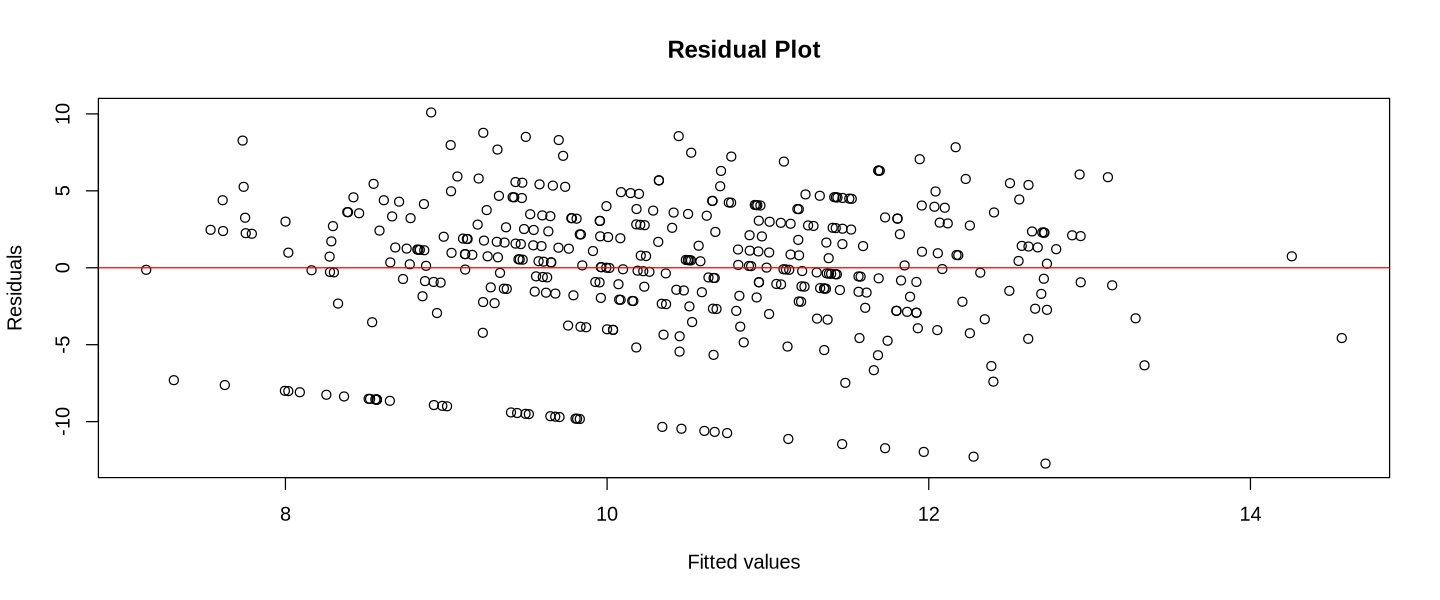

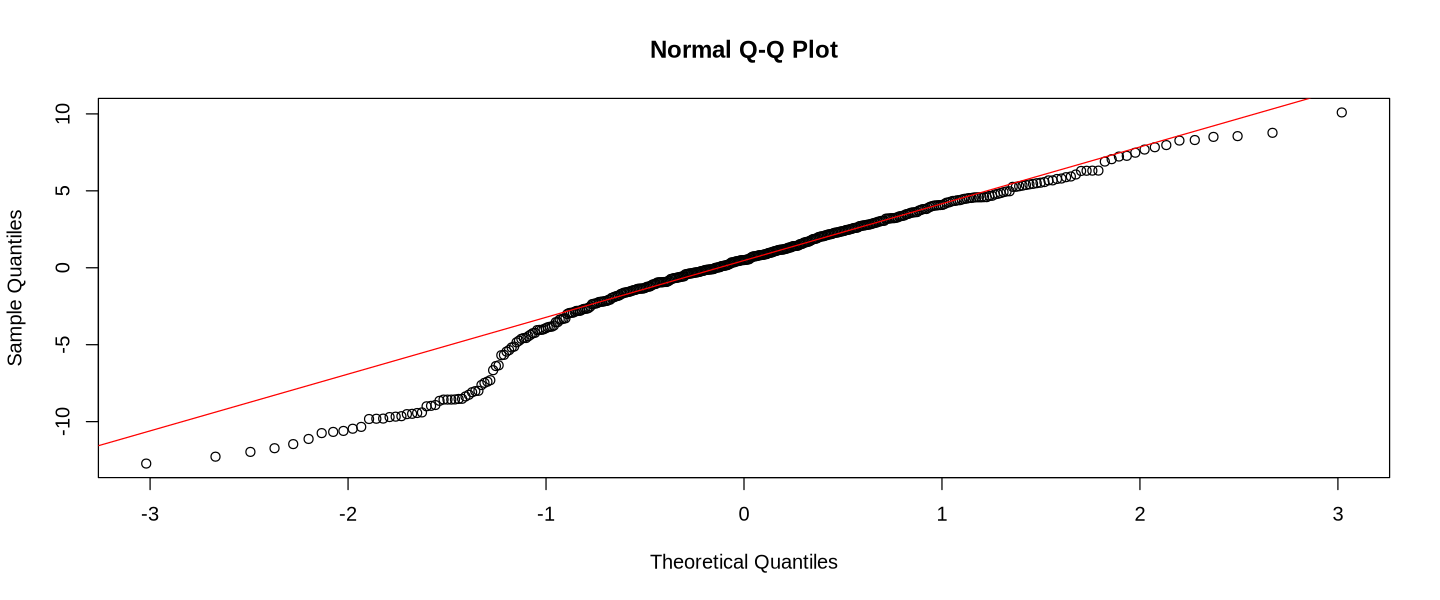

In [46]:
# Residual plot and QQ plot of model_initial
res_init <- residuals(model_initial)
fitted_vals_init <- fitted(model_initial)

plot(fitted_vals_init, res_init, xlab = "Fitted values", ylab = "Residuals", main = "Residual Plot")
abline(h = 0, col = "red")

qqnorm(res_init, main = "Normal Q-Q Plot")
qqline(res_init, col = "red")

We note that independence is satisfied assuming that each observation represents a student and no repeated measurements were taken by the authors.

Looking at the residual plot:
- We see that the residuals span a large range extending from about -10 to 10; large considering that the G3 scale ranges from 0 to 20.
- There are no signs of curvature in the residuals so linearity is relatively satisfied here, but the spread is not even across the range of fitted values, perhaps some signs of non-constant variance there.
- Although the residuals appear to form very straight line patterns, this is due to the response variable being discrete with integer grades so there are no causes of concern there.

Looking at the qq-plot:
- Most of the residuals between -1 to 1 of the theoretical quantile reasonably fit the reference line.
- The tails deviate below the reference line, so the plot is negative skewed. It indicates that the model overestimated students' final grades in Math, more evidence supporting that factors other than family and social variables are more strongly associated to their performance.
- Considering the size of the sample (n = 395), the Central Limit Theorem implies that the sampling distribution of the estimated coefficients are approximately Normal, so normality is satisfied here.

Overall, we indicate that there is some non-constant variance in the residuals but the model satisfies linearity, normality, and independence.

Although we understand that the initial model now supports the conclusion that family and social variables have little to no association with Math final grade, we want to explore what other variables in the dataset ARE more associated. This time, we will fit another linear model including G1 and G2, as the authors signal that G3 is strongly correlated with G1 and G2.

In [47]:
## Full Model including G1 and G2
model_full <- lm(G3 ~., data = studentData)
summary(model_full)


Call:
lm(formula = G3 ~ ., data = studentData)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8228 -0.4612  0.3141  1.0098  4.1768 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.35328    2.25132   1.045 0.296556    
sexM           0.19326    0.19956   0.968 0.333456    
age           -0.23291    0.07961  -2.926 0.003643 ** 
PstatusT      -0.13866    0.32332  -0.429 0.668275    
Medu1         -0.85371    1.13385  -0.753 0.451959    
Medu2         -0.98847    1.11932  -0.883 0.377741    
Medu3         -0.70963    1.12828  -0.629 0.529762    
Medu4         -0.68996    1.13486  -0.608 0.543572    
Fedu1          0.44589    1.37465   0.324 0.745839    
Fedu2         -0.31696    1.36893  -0.232 0.817019    
Fedu3          0.21940    1.36971   0.160 0.872823    
Fedu4         -0.15062    1.37199  -0.110 0.912640    
activitiesyes -0.37173    0.19746  -1.883 0.060526 .  
freetime       0.11986    0.09937   1.206 0.228458    
absences       0.0

The full model exhibits a massive improvement in the adjusted R-squared (0.0537 to 0.8273), indicating prior grades (G1 and G2) are extremely predictive of the final grade G3. The magnitudes of the standard errors are also reduced, which  improves the accuracy.

In this model, the significant covariates are `age`, `absences`, `G1`, and `G2` at 5% significance.
- For `age`, it suggests that older students are associated with lower G3 scores holding all other variables constant.
- For `absences`, it suggests that more absences are associated with higher G3 scores holding all other variables constant.
- For `G1` and `G2`, higher interim grades are associated with higher G3 scores holding all other variables constant.

It does not make sense, however, that more absences are associated with higher G3 scores. In our initial model, `absences` is not a significant covariate. Here, it may be because `G1` and `G2` are masking the true effect of `absences` as interim grades are largely associated with G3 scores.

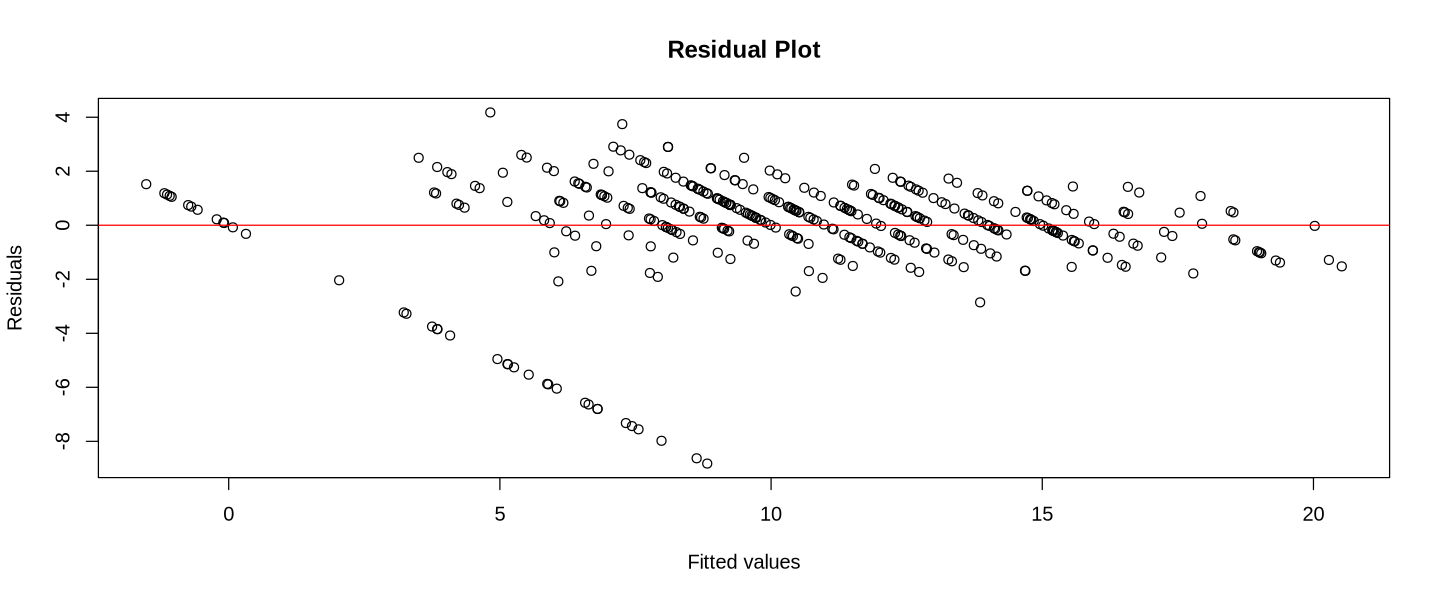

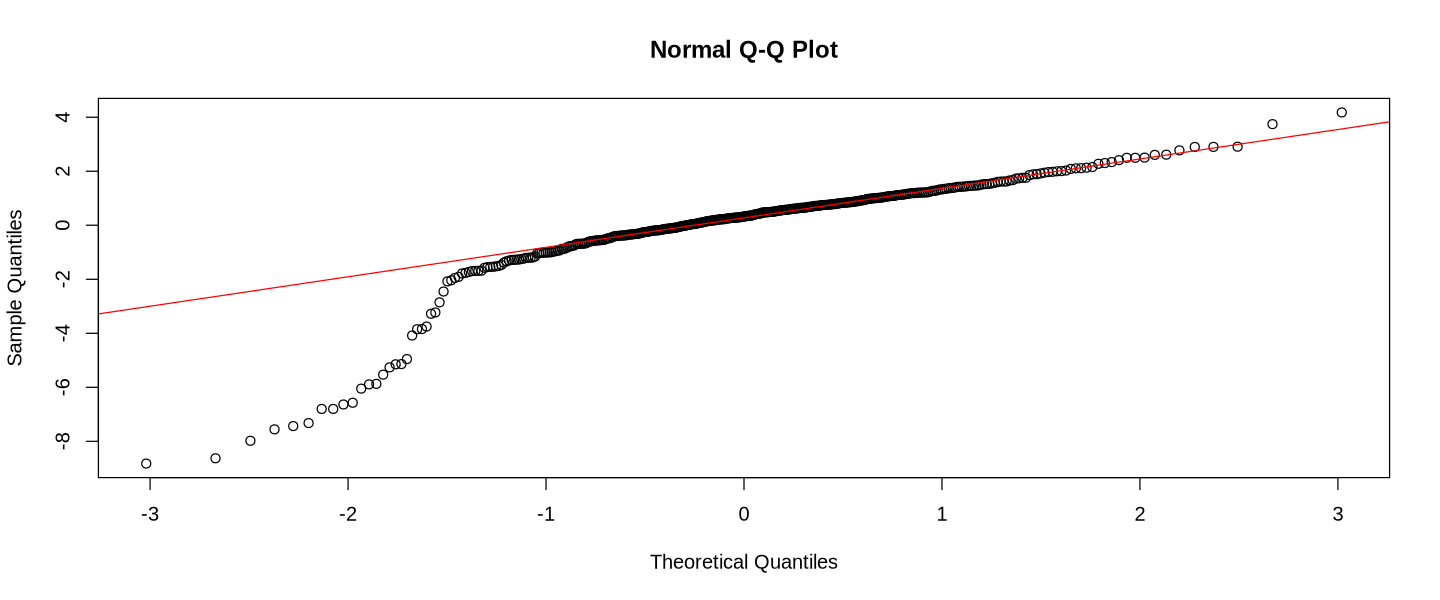

In [48]:
# Residual plot and QQ plot of model_full
res <- residuals(model_full)
fitted_vals <- fitted(model_full)

plot(fitted_vals, res, xlab = "Fitted values", ylab = "Residuals", main = "Residual Plot")
abline(h = 0, col = "red")

qqnorm(res, main = "Normal Q-Q Plot")
qqline(res, col = "red")

- For Residual Plot: the residuals show a certain pattern across fitted values, not entirely random, suggesting possible heteroscedasticity or model misspecification.
- For Normal QQ Plot: the residuals deviate from the straight line in the tails, especially in the lower left, indicating potential heavy tails or skewness. Given the sample size (n = 395), however, we can assume that the Central Limit Theorem holds such that the distribution of the estimated coefficients is approximately Normal.

## Conclusion